In [1]:
# !unzip D:\Codes\ai\archive.zip

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil

In [4]:
root_dir="D:/Codes/ai/brain_tumor_dataset"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
number_of_images

{'no': 1500, 'yes': 1500}

In [9]:
def datafolder(p, split):
  #create train folder
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(root_dir):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dir)),
                                  size = (math.floor(split*number_of_images[dir])-2),
                                  replace=False):
        o= os.path.join(root_dir,dir,img)
        d=os.path.join("./"+p,dir)
        shutil.copy(o,d)
        os.remove(o)
  else:
    print(f"{p} folder exists")

In [10]:
datafolder("train", 0.7)

train folder exists


In [11]:
datafolder("val", 0.15)

val folder exists


In [12]:
datafolder("test", 0.15)

test folder exists


In [13]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [44]:
#cnn model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation= 'relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 36)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)      

In [45]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [46]:
# preparing our data using data generator
def preprocessingImages1(path):
  """
  input: path
  output: pre processed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2, rescale= 1/255, horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=16, class_mode='binary')

  return image

In [47]:
path = "D:/Codes/ai/train"
train_data = preprocessingImages1(path)

Found 2096 images belonging to 2 classes.


In [48]:
# preparing our data using data generator
def preprocessingImages2(path):
  """
  input: path
  output: pre processed images
  """
  image_data=ImageDataGenerator(rescale= 1/255)
  image=image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=16, class_mode='binary')

  return image

In [49]:
path = "D:/Codes/ai/test"
test_data = preprocessingImages2(path)

Found 446 images belonging to 2 classes.


In [50]:
path = "D:/Codes/ai/val"
val_data = preprocessingImages2(path)

Found 446 images belonging to 2 classes.


In [53]:
# early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

#early stopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience=6, verbose=1, mode='auto')

#model checkpoint
mc = ModelCheckpoint(monitor='val_accuracy', filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]

In [54]:
#model training
import scipy
hs= model.fit(train_data, steps_per_epoch=10,
                        epochs=30, verbose=1,
                        validation_data=val_data,
                        validation_steps=16, callbacks=cd)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.5988 - accuracy: 0.7125
Epoch 1: val_accuracy improved from -inf to 0.77734, saving model to .\bestmodel.h5
10/10 [==============================] - 8s 815ms/step - loss: 0.5988 - accuracy: 0.7125 - val_loss: 0.5079 - val_accuracy: 0.7773 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.5855 - accuracy: 0.6562
Epoch 2: val_accuracy improved from 0.77734 to 0.78125, saving model to .\bestmodel.h5
10/10 [==============================] - 7s 730ms/step - loss: 0.5855 - accuracy: 0.6562 - val_loss: 0.4921 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.6096 - accuracy: 0.6625
Epoch 3: val_accuracy did not improve from 0.78125
10/10 [==============================] - 7s 699ms/step - loss: 0.6096 - accuracy: 0.6625 - val_loss: 0.4856 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - ETA: 0s - lo

In [55]:
#model graphical representation
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

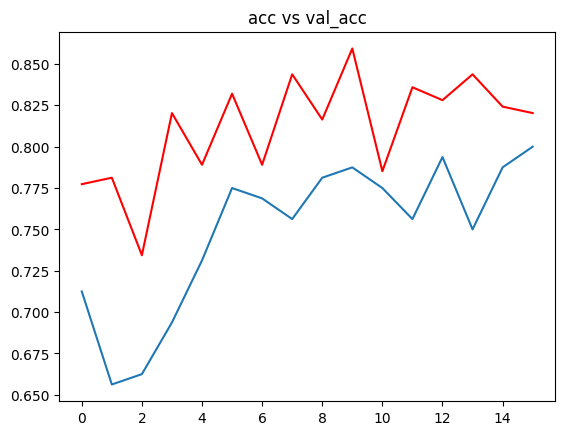

In [56]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")

plt.title("acc vs val_acc")
plt.show()

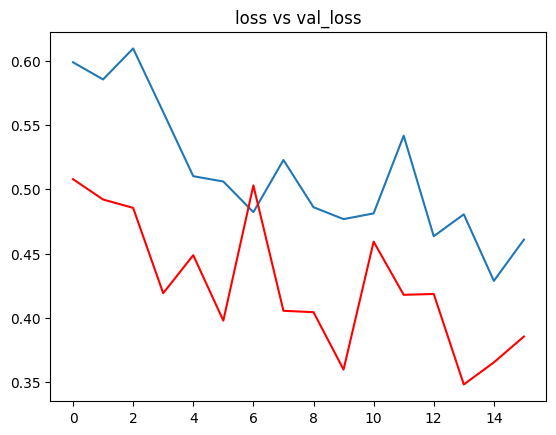

In [57]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")

plt.title("loss vs val_loss")
plt.show()

In [64]:
# model accuracy

from keras.models import load_model

model = load_model("D:/Codes/ai/bestmodel.h5")

In [66]:
# model accuracy

acc= model.evaluate_generator(test_data)[1]

print(f"accuracy of our model is {acc*100}%")

accuracy of our model is 83.18385481834412%


In [60]:
from keras.preprocessing.image import load_img, img_to_array

1/1 [==============================] - 0s 121ms/step
the image is not having tumor


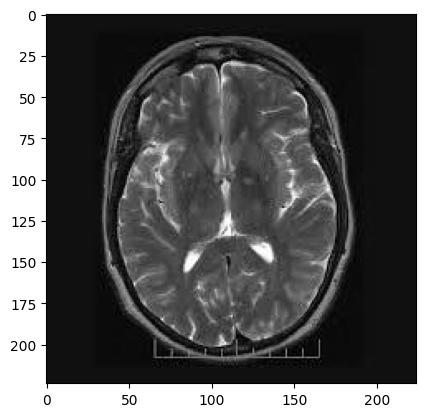

In [61]:
path = "D:/Codes/ai/brain_tumor_dataset/no/no55.jpg"

img = load_img(path, target_size=(224,224))
input_arr= img_to_array(img)/255

plt.imshow(input_arr)

input_arr.shape

input_arr= np.expand_dims(input_arr, axis=0)

pred = model.predict(input_arr)[0][0]

if round(pred)==0:
  print("the image is not having tumor")
else:
  print("the image is having tumor")

In [62]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [31]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
